In [10]:
from skimage.metrics import structural_similarity as compare_ssim
from skimage.metrics import peak_signal_noise_ratio as compare_psnr
from PIL import Image
import numpy as np
import os
import torch

In [11]:
def calc_ssim(img1_path, img2_path):
    '''
    Parameters
    ----------
    img1_path : str
        图像1的路径.
    img2_path : str
        图像2的路径.

    Returns
    -------
    ssim_score : numpy.float64
        结构相似性指数（structural similarity index，SSIM）.
        
    References
    -------
    https://scikit-image.org/docs/dev/auto_examples/transform/plot_ssim.html

    '''
    img1 = Image.open(img1_path).convert('L')
    img2 = Image.open(img2_path).convert('L')
    img1 = img1.resize(img2.size)
    img1, img2 = np.array(img1), np.array(img2)
    # 此处因为转换为灰度值之后的图像范围是0-255，所以data_range为255，如果转化为浮点数，且是0-1的范围，则data_range应为1
    ssim_score = compare_ssim(img1, img2, data_range=255)
    return ssim_score


In [12]:
def calc_psnr(img1_path, img2_path):
    '''
    Parameters
    ----------
    img1_path : str
        图像1的路径.
    img2_path : str
        图像2的路径.

    Returns
    -------
    psnr_score : numpy.float64
        峰值信噪比(Peak Signal to Noise Ratio, PSNR).
        
    References
    -------
    https://en.wikipedia.org/wiki/Peak_signal-to-noise_ratio

    '''
    img1 = Image.open(img1_path).convert("RGB")
    #img1 = Image.open(img1_path)
    img2 = Image.open(img2_path).convert("RGB")
    img1 = img1.resize(img2.size)
    img1, img2 = np.array(img1), np.array(img2)
    # 此处的第一张图片为真实图像，第二张图片为测试图片
    # 此处因为图像范围是0-255，所以data_range为255，如果转化为浮点数，且是0-1的范围，则data_range应为1
    psnr_score = compare_psnr(img1, img2, data_range=255)
    return psnr_score

In [13]:
def compute_MSE(img1, img2):
    img1 = np.array(Image.open(img1).convert("RGB"))
    img2 = np.array(Image.open(img2).convert("RGB"))
    return ((img1 - img2) ** 2).mean()


def compute_RMSE(img1, img2):
    if type(img1) == torch.Tensor:
        return torch.sqrt(compute_MSE(img1, img2)).item()
    else:
        return np.sqrt(compute_MSE(img1, img2))

In [14]:
n = 560
a = 0
b = 0
c = 0
rootdir1 = "../datasets/256/full/L067"
list1 =  sorted(os.listdir(rootdir1))[:n]
for i in range(len(list1)):
    list1[i] = rootdir1+"/"+str(list1[i])
    
rootdir2 = "guide_scale/0.1"
list2 =  sorted(os.listdir(rootdir2))[:n]
for i in range(len(list2)):
    list2[i] = rootdir2+"/"+str(list2[i])
psnr1=psnr2=psnr3=ssim1=ssim2=ssim3 = 0
for i in range(len(list1)):

    psnrc = calc_psnr(list1[i],list2[i])  #加创新点前，重建结果与LDCT对应的PSNR
    a = a + psnrc

    ssimc =calc_ssim(list1[i],list2[i])  #加创新点前，重建结果与LDCT对应的SSIM
    b = b + ssimc

    rmsec = compute_RMSE(list1[i],list2[i])
    c = c + rmsec
    #print("SSIM为：{}，PSNR为：{}".format(ssimc,psnrc))
print("avg:psnr{},ssim{},rmse{}".format(a/n,b/n,c/n))

avg:psnr32.42458393219545,ssim0.8570582352602739,rmse5.637302395357042


In [14]:
n = 472
a = 0
b = 0
rootdir1 = "../datasets/256/full/L506"
list1 =  sorted(os.listdir(rootdir1))[:n]
for i in range(len(list1)):
    list1[i] = rootdir1+"/"+str(list1[i])
    
rootdir2 = "result_L506_3"
list2 =  sorted(os.listdir(rootdir2))[:n]
for i in range(len(list2)):
    list2[i] = rootdir2+"/"+str(list2[i])
psnr1=psnr2=psnr3=ssim1=ssim2=ssim3 = 0
for i in range(len(list1)):

    psnrc = calc_psnr(list1[i],list2[i])  #加创新点前，重建结果与LDCT对应的PSNR
    a = a + psnrc

    ssimc =calc_ssim(list1[i],list2[i])  #加创新点前，重建结果与LDCT对应的SSIM
    b = b + ssimc
    print("SSIM为：{}，PSNR为：{}".format(ssimc,psnrc))
print("avg:psnr{},ssim{}".format(a/n,b/n))

SSIM为：0.9388002296981255，PSNR为：30.419392620489933
SSIM为：0.9157460623016016，PSNR为：27.450683979612155
SSIM为：0.9377363808324476，PSNR为：29.645600924311527
SSIM为：0.9597632807508824，PSNR为：40.45260358565579
SSIM为：0.9585578312088333，PSNR为：39.116532927442755
SSIM为：0.9573136267102411，PSNR为：39.141701254949204
SSIM为：0.9543169365357723，PSNR为：36.00433378203594
SSIM为：0.9565153885746649，PSNR为：36.36404863246276
SSIM为：0.9553744537830267，PSNR为：35.29721910686897
SSIM为：0.9599465583300814，PSNR为：38.80208468354741
SSIM为：0.9561121504052741，PSNR为：35.704729525701765
SSIM为：0.9562453738975017，PSNR为：35.26762539401123
SSIM为：0.9622300855463961，PSNR为：39.386681258014875
SSIM为：0.9621923421039714，PSNR为：39.74173073369497
SSIM为：0.9590253457738837，PSNR为：37.08742232410961
SSIM为：0.962337089372241，PSNR为：40.598458693263424
SSIM为：0.9614257767564951，PSNR为：38.667492344040966
SSIM为：0.9636240744846665，PSNR为：40.32198631386582
SSIM为：0.961714228050245，PSNR为：38.59026142671696
SSIM为：0.9486208784558054，PSNR为：30.911834338774646
SSIM为：0.9402

In [4]:
n = 560
a = 0
b = 0
rootdir1 = "../datasets/256/full/L067"
list1 =  sorted(os.listdir(rootdir1))[:n]
for i in range(len(list1)):
    list1[i] = rootdir1+"/"+str(list1[i])
    
rootdir2 = "result/newmodel670000"
list2 =  sorted(os.listdir(rootdir2))[:n]
for i in range(len(list2)):
    list2[i] = rootdir2+"/"+str(list2[i])
psnr1=psnr2=psnr3=ssim1=ssim2=ssim3 = 0
for i in range(len(list1)):

    psnrc = calc_psnr(list1[i],list2[i])  #加创新点前，重建结果与LDCT对应的PSNR
    a = a + psnrc

    ssimc =calc_ssim(list1[i],list2[i])  #加创新点前，重建结果与LDCT对应的SSIM
    b = b + ssimc
    print("SSIM为：{}，PSNR为：{}".format(ssimc,psnrc))
print("avg:psnr{},ssim{}".format(a/n,b/n))

SSIM为：0.9228854072023743，PSNR为：33.09380967009213
SSIM为：0.9245228490736389，PSNR为：34.448410440098115
SSIM为：0.9213022103611109，PSNR为：31.422891016283216
SSIM为：0.9234873494120479，PSNR为：32.92197817104153
SSIM为：0.9311891251627684，PSNR为：35.45050503234095
SSIM为：0.9331757578520931，PSNR为：35.09189188070083
SSIM为：0.929846375068902，PSNR为：34.245320456542345
SSIM为：0.9333150623083499，PSNR为：34.22152958170498
SSIM为：0.9350295499177351，PSNR为：36.16969236747594
SSIM为：0.9371952680415617，PSNR为：37.2410136729967
SSIM为：0.9385663361936272，PSNR为：37.426687339780166
SSIM为：0.9323125335465251，PSNR为：33.965695992320526
SSIM为：0.9349447981589617，PSNR为：36.3144690518702
SSIM为：0.9358826650825295，PSNR为：34.36441446649164
SSIM为：0.932777793552355，PSNR为：31.897181664444716
SSIM为：0.9325788836140815，PSNR为：32.64893812298404
SSIM为：0.9379557605404345，PSNR为：34.74323677336556
SSIM为：0.9403975397314227，PSNR为：37.01941195842129
SSIM为：0.9427421620799632，PSNR为：37.5094295405494
SSIM为：0.9416349244852953，PSNR为：36.07973415861797
SSIM为：0.94217038296

In [4]:
n = 560
a = 0
b = 0
rootdir1 = "../datasets/256/full/L067"
list1 =  sorted(os.listdir(rootdir1))[:n]
for i in range(len(list1)):
    list1[i] = rootdir1+"/"+str(list1[i])
    
rootdir2 = "result/newmodel/200000"
list2 =  sorted(os.listdir(rootdir2))[:n]
for i in range(len(list2)):
    list2[i] = rootdir2+"/"+str(list2[i])
psnr1=psnr2=psnr3=ssim1=ssim2=ssim3 = 0
for i in range(len(list1)):

    psnrc = calc_psnr(list1[i],list2[i])  #加创新点前，重建结果与LDCT对应的PSNR
    a = a + psnrc

    ssimc =calc_ssim(list1[i],list2[i])  #加创新点前，重建结果与LDCT对应的SSIM
    b = b + ssimc
    print("SSIM为：{}，PSNR为：{}".format(ssimc,psnrc))
print("avg:psnr{},ssim{}".format(a/n,b/n))

SSIM为：0.9268897804574663，PSNR为：34.288104476136496
SSIM为：0.9332829580681198，PSNR为：36.87780778850432
SSIM为：0.929099551501854，PSNR为：33.700038396687304
SSIM为：0.9302942177705683，PSNR为：35.45783278516433
SSIM为：0.934954246919475，PSNR为：35.82898412970365
SSIM为：0.9326468621354667，PSNR为：32.875466322513816
SSIM为：0.9370441552140854，PSNR为：36.5018144915169
SSIM为：0.9365018163224489，PSNR为：34.37668312925468
SSIM为：0.9391403350053584，PSNR为：37.225036418614714
SSIM为：0.9400674136945778，PSNR为：37.408758189497284
SSIM为：0.9431347449836012，PSNR为：37.989382661657004
SSIM为：0.9379172955089147，PSNR为：36.6948276095397
SSIM为：0.9363375682519878，PSNR为：34.23931046708355
SSIM为：0.9391800955352867，PSNR为：34.91319399143829
SSIM为：0.9400336008781889，PSNR为：35.10805097413327
SSIM为：0.9402751120952151，PSNR为：35.72388215400986
SSIM为：0.94269005705491，PSNR为：35.10824480825107
SSIM为：0.9444005618457544，PSNR为：37.748861159412336
SSIM为：0.9452650930219186，PSNR为：38.186184228189866
SSIM为：0.9484581056253416，PSNR为：38.418837861819775
SSIM为：0.944048573

In [19]:
n = 560
a = 0
b = 0
rootdir1 = "../datasets/256/full/L067"
list1 =  sorted(os.listdir(rootdir1))[:n]
for i in range(len(list1)):
    list1[i] = rootdir1+"/"+str(list1[i])
    
rootdir2 = "result/newmodel/170000"
list2 =  sorted(os.listdir(rootdir2))[:n]
for i in range(len(list2)):
    list2[i] = rootdir2+"/"+str(list2[i])
psnr1=psnr2=psnr3=ssim1=ssim2=ssim3 = 0
for i in range(len(list1)):

    psnrc = calc_psnr(list1[i],list2[i])  #加创新点前，重建结果与LDCT对应的PSNR
    a = a + psnrc

    ssimc =calc_ssim(list1[i],list2[i])  #加创新点前，重建结果与LDCT对应的SSIM
    b = b + ssimc
    print("SSIM为：{}，PSNR为：{}".format(ssimc,psnrc))
print("avg:psnr{},ssim{}".format(a/n,b/n))

SSIM为：0.9278846107118927，PSNR为：34.575571668302246
SSIM为：0.9297063173377322，PSNR为：35.62359327855981
SSIM为：0.9269282158265132，PSNR为：33.06248295134721
SSIM为：0.9306422143580156，PSNR为：36.605205888687856
SSIM为：0.9364666957688781，PSNR为：36.359193809043845
SSIM为：0.9357368801575073，PSNR为：35.55643835660729
SSIM为：0.9367991786697039，PSNR为：37.48960089266936
SSIM为：0.9384403458978612，PSNR为：36.04797497163294
SSIM为：0.9381055273387174，PSNR为：36.91507466956977
SSIM为：0.941484187616248，PSNR为：38.246892429773204
SSIM为：0.9416510220333545，PSNR为：38.2955662819093
SSIM为：0.9385107804724409，PSNR为：36.87142457864409
SSIM为：0.9355331594564859，PSNR为：34.9576226752787
SSIM为：0.9374527954316885，PSNR为：33.78252195407538
SSIM为：0.9369717547061024，PSNR为：33.43010640319841
SSIM为：0.9386592181832896，PSNR为：34.848594979669954
SSIM为：0.9384291149361084，PSNR为：33.09298762933919
SSIM为：0.943725318910634，PSNR为：37.977043756262894
SSIM为：0.9443421093478109，PSNR为：37.90862285981797
SSIM为：0.9474212665674151，PSNR为：38.6324487410355
SSIM为：0.94416014849

In [4]:
n = 560
a = 0
b = 0
rootdir1 = "../datasets/256/full/L067"
list1 =  sorted(os.listdir(rootdir1))[:n]
for i in range(len(list1)):
    list1[i] = rootdir1+"/"+str(list1[i])
    
rootdir2 = "result/newmodel/160000"
list2 =  sorted(os.listdir(rootdir2))[:n]
for i in range(len(list2)):
    list2[i] = rootdir2+"/"+str(list2[i])
psnr1=psnr2=psnr3=ssim1=ssim2=ssim3 = 0
for i in range(len(list1)):

    psnrc = calc_psnr(list1[i],list2[i])  #加创新点前，重建结果与LDCT对应的PSNR
    a = a + psnrc

    ssimc =calc_ssim(list1[i],list2[i])  #加创新点前，重建结果与LDCT对应的SSIM
    b = b + ssimc
    print("SSIM为：{}，PSNR为：{}".format(ssimc,psnrc))
print("avg:psnr{},ssim{}".format(a/n,b/n))

SSIM为：0.9257916051714861，PSNR为：34.60638443895374
SSIM为：0.9274051223417324，PSNR为：35.02817339828519
SSIM为：0.93002582806487，PSNR为：34.416962189633736
SSIM为：0.9309772066674149，PSNR为：36.11686042877687
SSIM为：0.9316968536329535，PSNR为：34.60258703608939
SSIM为：0.9331568323857683，PSNR为：33.57293656000124
SSIM为：0.9376904616988287，PSNR为：37.96740671356843
SSIM为：0.9356718864918055，PSNR为：34.4736150833069
SSIM为：0.9384923631506233，PSNR为：37.45315269192955
SSIM为：0.9398224822218393，PSNR为：37.86865366212524
SSIM为：0.9411233085192237，PSNR为：37.97526381932285
SSIM为：0.9377479503133238，PSNR为：36.209503269253126
SSIM为：0.9357994213483052，PSNR为：35.603290515775726
SSIM为：0.9378294860766621，PSNR为：35.71225893600712
SSIM为：0.9316275012309293，PSNR为：31.56509099640943
SSIM为：0.9380258176025373，PSNR为：34.52836195867545
SSIM为：0.9385043694453392，PSNR为：33.72290369583394
SSIM为：0.9418912235436887，PSNR为：37.288154818025724
SSIM为：0.9423143239231493，PSNR为：37.4315060458146
SSIM为：0.94815327838675，PSNR为：38.07969474717325
SSIM为：0.94455039162194

In [7]:
n = 32
a = 0
b = 0
rootdir1 = "datasets/CTLDR/full/L067/"
list1 =  sorted(os.listdir(rootdir1))[:n]
for i in range(len(list1)):
    list1[i] = rootdir1+"/"+str(list1[i])
    
rootdir2 = "result/CAWM_1067"
list2 =  sorted(os.listdir(rootdir2))[:n]
for i in range(len(list2)):
    list2[i] = rootdir2+"/"+str(list2[i])
psnr1=psnr2=psnr3=ssim1=ssim2=ssim3 = 0
for i in range(len(list1)):

    psnrc = calc_psnr(list1[i],list2[i])  #加创新点前，重建结果与LDCT对应的PSNR
    a = a + psnrc

    ssimc =calc_ssim(list1[i],list2[i])  #加创新点前，重建结果与LDCT对应的SSIM
    b = b + ssimc
    print("SSIM为：{}，PSNR为：{}".format(ssimc,psnrc))
print("avg:psnr{},ssim{}".format(a/n,b/n))

FileNotFoundError: [Errno 2] No such file or directory: 'datasets/CTLDR/full/L067/'

python scripts/ilvr_sample.py --attention_resolutions 16 --class_cond False --diffusion_steps 1000 --dropout 0.0 --image_size 256 --learn_si
gma True --noise_schedule linear --num_channels 128 --num_head_channels 128 --num_res_blocks 2 --resblock_updown True --use_fp16 False --use_scale_shift_norm True --timestep_respacing 100 --down_N 4
 --range_t 0 --model_path models/CAWM/ema_0.9999_130000.pt --base_samples ref_imgs/CTLDR/quarter/L067/ --save_dir result/CAWM_1067
 avg:psnr35.81690280029091,ssim0.9425153267856033

python scripts/ilvr_sample.py --attention_resolutions 16 --class_cond False --diffusion_steps 1000 --dropout 0.0 --image_size 256 --learn_sigma True --noise_schedule linear --num_channels 128 --num_head_channels 128 --num_res_blocks 2 --resblock_updown True --use_fp16 False --use_scale_shift_norm True --timestep_respacing 100 --down_N 4 --range_t 0 --model_path models/CAWM/ema_0.9999_120000.pt --base_samples ref_imgs/CTLDR/quarter/L067/ --save_dir result/CAWM_1067  avg:psnr35.1941178160631,ssim0.9366265499569884

python scripts/ilvr_sample.py --attention_resolutions 16 --class_cond False --diffusion_steps 1000 --dropout 0.0 --image_size 256 --learn_sigma True --noise_schedule linear --num_channels 128 --num_head_channels 128 --num_res_blocks 2 --resblock_updown True --use_fp16 False --use_scale_shift_norm True --timestep_respacing 100 --down_N 8 --range_t 0 --model_path models/CAWM/ema_0.9999_120000.pt --base_samples ref_imgs/CTLDR/quarter/L067/ --save_dir result/CAWM_1067
avg:psnr34.9367976254869,ssim0.935918371341802

python scripts/ilvr_sample.py --attention_resolutions 16 --class_cond False --diffusion_steps 1000 --dropout 0.0 --image_size 256 --learn_sigma True --noise_schedule linear --num_channels 128 --num_head_channels 128 --num_res_blocks 2 --resblock_updown True --use_fp16 False --use_scale_shift_norm True --timestep_respacing 100 --down_N 16 --range_t 20 --model_path models/CAWM/ema_0.9999_120000.pt --base_samples ref_imgs/CTLDR/quarter/L067/ --save_dir result/CAWM_1067 1.9 psnr33.36255739198097,ssim0.8973152103723597

python scripts/ilvr_sample.py --attention_resolutions 16 --class_cond False --diffusion_steps 1000 --dropout 0.0 --image_size 256 --learn_sigma True --noise_schedule linear --num_channels 128 --num_head_channels 128 --num_res_blocks 2 --resblock_updown True --use_fp16 False --use_scale_shift_norm True --timestep_respacing 100 --down_N 16 --range_t 10 --model_path models/CAWM/ema_0.9999_120000.pt --base_samples ref_imgs/CTLDR/quarter/L067/ --save_dir result/CAWM_1067 1.9 33.22224794875393,ssim0.9054273077465703

python scripts/ilvr_sample.py --attention_resolutions 16 --class_cond False --diffusion_steps 1000 --dropout 0.0 --image_size 256 --learn_sigma True --noise_schedule linear --num_channels 128 --num_head_channels 128 --num_res_blocks 2 --resblock_updown True --use_fp16 False --use_scale_shift_norm True --timestep_respacing 100 --down_N 16 --range_t 1 --model_path models/CAWM/ema_0.9999_120000.pt --base_samples ref_imgs/CTLDR/quarter/L067/ --save_dir result/CAWM_1067 1.9
avg:psnr34.044030015965916,ssim0.92552217405767

In [11]:
rootdir1 = "datasets/CTLDR/full/L067"
list1 =  sorted(os.listdir(rootdir1))[:560]
for i in range(len(list1)):
    list1[i] = rootdir1+"/"+str(list1[i])
    
rootdir2 = "output/CTLDR/ivlr_result/"
list2 =  sorted(os.listdir(rootdir2))[:560]
for i in range(len(list2)):
    list2[i] = rootdir2+"/"+str(list2[i])
    
rootdir3 = "output/cond_attn_map_guidance/"
list3 =  sorted(os.listdir(rootdir3))[:560]
for i in range(len(list3)):
    list3[i] = rootdir3+"/"+str(list3[i])
    
rootdir4 = "datasets/CTLDR/quater/L067"
list4 =  sorted(os.listdir(rootdir4))[:560]
for i in range(len(list4)):
    list4[i] = rootdir4+"/"+str(list4[i])

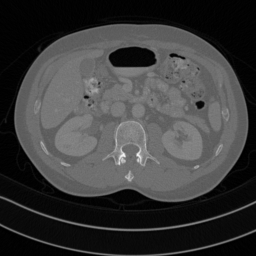

In [16]:
im = Image.open(list1[160])
im.show()

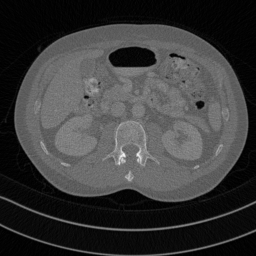

In [17]:
im = Image.open(list4[160])
im.show()

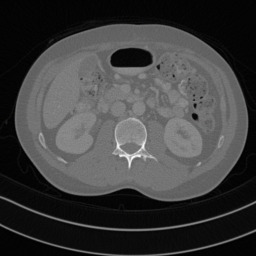

In [21]:
im = Image.open(list3[160])
im.show()

In [12]:
n = 16
a = 0
b = 0
rootdir1 = "datasets/CTLDR/full/L067/"
list1 =  sorted(os.listdir(rootdir1))[:n]
for i in range(len(list1)):
    list1[i] = rootdir1+"/"+str(list1[i])
    
rootdir2 = "result/GLFM_L067/2.20/"
list2 =  sorted(os.listdir(rootdir2))[:n]
for i in range(len(list2)):
    list2[i] = rootdir2+"/"+str(list2[i])
psnr1=psnr2=psnr3=ssim1=ssim2=ssim3 = 0
for i in range(len(list1)):

    psnrc = calc_psnr(list1[i],list2[i])  #加创新点前，重建结果与LDCT对应的PSNR
    a = a + psnrc

    ssimc =calc_ssim(list1[i],list2[i])  #加创新点前，重建结果与LDCT对应的SSIM
    b = b + ssimc
    print("SSIM为：{}，PSNR为：{}".format(ssimc,psnrc))
print("avg:psnr{},ssim{}".format(a/n,b/n))

SSIM为：0.9058366383675699，PSNR为：34.689647220572944
SSIM为：0.8238946305060546，PSNR为：28.25684401998189
SSIM为：0.9145649744150903，PSNR为：33.65003910613927
SSIM为：0.8284066778715672，PSNR为：28.05414447065938
SSIM为：0.8957567414626691，PSNR为：32.39122494921747
SSIM为：0.8693963594670917，PSNR为：30.561358384086745
SSIM为：0.9109735197972366，PSNR为：34.98449670243937
SSIM为：0.9160332120123404，PSNR为：35.59314136692277
SSIM为：0.9069426669214068，PSNR为：33.285976890834654
SSIM为：0.9146000965973357，PSNR为：35.60422623985977
SSIM为：0.8995033171510917，PSNR为：31.871725649817897
SSIM为：0.914273919728845，PSNR为：35.00507057737872
SSIM为：0.8319999759051422，PSNR为：28.480313593390093
SSIM为：0.7565806683054319，PSNR为：25.889590193161
SSIM为：0.7759343646904128，PSNR为：26.610567805925392
SSIM为：0.9249286960612207，PSNR为：34.73761961353454
avg:psnr31.854124173995118,ssim0.8743516537037817


In [4]:
n = 560
a = 0
b = 0
rootdir1 = "datasets/CTLDR/full/L067/"
list1 =  sorted(os.listdir(rootdir1))[:n]
for i in range(len(list1)):
    list1[i] = rootdir1+"/"+str(list1[i])
    
rootdir2 = "datasets/CTLDR/quater/L067/"
list2 =  sorted(os.listdir(rootdir2))[:n]
for i in range(len(list2)):
    list2[i] = rootdir2+"/"+str(list2[i])
psnr1=psnr2=psnr3=ssim1=ssim2=ssim3 = 0
for i in range(len(list1)):

    psnrc = calc_psnr(list1[i],list2[i])  #加创新点前，重建结果与LDCT对应的PSNR
    a = a + psnrc

    ssimc =calc_ssim(list1[i],list2[i])  #加创新点前，重建结果与LDCT对应的SSIM
    b = b + ssimc
    print("SSIM为：{}，PSNR为：{}".format(ssimc,psnrc))
print("avg:psnr{},ssim{}".format(a/n,b/n))

# psnr2 = psnr2/len(list1)


# ssim2 = ssim2/len(list1)

# print("数据集为full，加入创新点之前，ULDCT重建后的结果与LDCT对应的SSIM为：{}，PSNR为：{}".format(ssim2,psnr2))


SSIM为：0.9173184284381974，PSNR为：36.923624710618284
SSIM为：0.9230019430933136，PSNR为：34.79564763359949
SSIM为：0.9189313109012035，PSNR为：37.017840579580145
SSIM为：0.9237054796998555，PSNR为：35.64037714705448
SSIM为：0.9256596700351307，PSNR为：37.86140003464132
SSIM为：0.9307167039678229，PSNR为：38.310919637106295
SSIM为：0.9287985615138855，PSNR为：38.23239873097502
SSIM为：0.9325427613827657，PSNR为：38.19066334319061
SSIM为：0.9326592027537963，PSNR为：38.52468563371697
SSIM为：0.9356623442417065，PSNR为：37.71292054797831
SSIM为：0.9387710739986123，PSNR为：37.057046491094546
SSIM为：0.9343424822556144，PSNR为：37.19588886062609
SSIM为：0.9335177981694299，PSNR为：38.032372988464225
SSIM为：0.9395104952722837，PSNR为：36.870452785214425
SSIM为：0.9363775941237555，PSNR为：38.59808658563145
SSIM为：0.9332614125483956，PSNR为：38.04701268901093
SSIM为：0.9391622806602771，PSNR为：38.81582482863059
SSIM为：0.9420166117786389，PSNR为：36.701334549453016
SSIM为：0.9421649244222369，PSNR为：37.134296836566
SSIM为：0.9460583257884037，PSNR为：38.04047193704192
SSIM为：0.9438372

In [20]:
list1 =  sorted(os.listdir(rootdir1))[65:182]
for i in range(len(list1)):
    list1[i] = rootdir1+"/"+str(list1[i])
print(list1)

['datasets/CTLDR/full/L067//L067_FD_1_1.CT.0001.0066.2015.12.22.18.09.40.840353.358075779.png', 'datasets/CTLDR/full/L067//L067_FD_1_1.CT.0001.0067.2015.12.22.18.09.40.840353.358075803.png', 'datasets/CTLDR/full/L067//L067_FD_1_1.CT.0001.0068.2015.12.22.18.09.40.840353.358075827.png', 'datasets/CTLDR/full/L067//L067_FD_1_1.CT.0001.0069.2015.12.22.18.09.40.840353.358075851.png', 'datasets/CTLDR/full/L067//L067_FD_1_1.CT.0001.0070.2015.12.22.18.09.40.840353.358075875.png', 'datasets/CTLDR/full/L067//L067_FD_1_1.CT.0001.0071.2015.12.22.18.09.40.840353.358075899.png', 'datasets/CTLDR/full/L067//L067_FD_1_1.CT.0001.0072.2015.12.22.18.09.40.840353.358075923.png', 'datasets/CTLDR/full/L067//L067_FD_1_1.CT.0001.0073.2015.12.22.18.09.40.840353.358075947.png', 'datasets/CTLDR/full/L067//L067_FD_1_1.CT.0001.0074.2015.12.22.18.09.40.840353.358075971.png', 'datasets/CTLDR/full/L067//L067_FD_1_1.CT.0001.0075.2015.12.22.18.09.40.840353.358075995.png', 'datasets/CTLDR/full/L067//L067_FD_1_1.CT.0001.00

In [21]:
n = 182 - 65 + 1 
a = 0
b = 0
rootdir1 = "datasets/CTLDR/full/L067/"
list1 =  sorted(os.listdir(rootdir1))[65:182]
for i in range(len(list1)):
    list1[i] = rootdir1+"/"+str(list1[i])
    
rootdir2 = "result/ditribute_GLFM/2/"
list2 =  sorted(os.listdir(rootdir2))[:n]
for i in range(len(list2)):
    list2[i] = rootdir2+"/"+str(list2[i])
psnr1=psnr2=psnr3=ssim1=ssim2=ssim3 = 0
index = []
for i in range(len(list1)):

    psnrc = calc_psnr(list1[i],list2[i])  #加创新点前，重建结果与LDCT对应的PSNR

    a = a + psnrc

    ssimc =calc_ssim(list1[i],list2[i])  #加创新点前，重建结果与LDCT对应的SSIM
    b = b + ssimc
    if calc_ssim(list1[i],list2[i])>0.90 and calc_psnr(list1[i],list2[i])>32:
        index.append(i)
    print("SSIM为：{}，PSNR为：{}".format(ssimc,psnrc))
print("avg:psnr{},ssim{}".format(a/n,b/n))
print(index)
# psnr2 = psnr2/len(list1)


# ssim2 = ssim2/len(list1)

# print("数据集为full，加入创新点之前，ULDCT重建后的结果与LDCT对应的SSIM为：{}，PSNR为：{}".format(ssim2,psnr2))


SSIM为：0.8246167263785646，PSNR为：29.77312531859779
SSIM为：0.7976073956089103，PSNR为：27.405899933611533
SSIM为：0.38511469150591077，PSNR为：15.959464745727207
SSIM为：0.3801971634367422，PSNR为：16.131547287700727
SSIM为：0.69607900409147，PSNR为：23.08463221620906
SSIM为：0.7380545470737647，PSNR为：25.05202551630034
SSIM为：0.8072846941858237，PSNR为：28.342918205488154
SSIM为：0.7705110683821067，PSNR为：25.398456287454447
SSIM为：0.7139919104309779，PSNR为：24.34811530866891
SSIM为：0.7627928264304992，PSNR为：25.877176866566924
SSIM为：0.7360030227111631，PSNR为：25.461258908745215
SSIM为：0.8349659497443396，PSNR为：31.294158829448936
SSIM为：0.6432274305681739，PSNR为：22.086607558158484
SSIM为：0.818794899123154，PSNR为：29.7305249915752
SSIM为：0.4105083764012832，PSNR为：16.546499201619124
SSIM为：0.7641749572971217，PSNR为：27.881563717485207
SSIM为：0.7258256861873814，PSNR为：25.902234796472953
SSIM为：0.5682876757562246，PSNR为：20.65550104571669
SSIM为：0.5996799679864282，PSNR为：21.809438226535917
SSIM为：0.8678730556576888，PSNR为：35.8269212449956
SSIM为：0.603

In [4]:
n = 560
a = 0
b = 0
rootdir1 = "datasets/CTLDR/full/L067/"
list1 =  sorted(os.listdir(rootdir1))[:n]
for i in range(len(list1)):
    list1[i] = rootdir1+"/"+str(list1[i])
    
rootdir2 = "result/GLFM_L067/330000/"
list2 =  sorted(os.listdir(rootdir2))[:n]
for i in range(len(list2)):
    list2[i] = rootdir2+"/"+str(list2[i])
psnr1=psnr2=psnr3=ssim1=ssim2=ssim3 = 0
index = []
for i in range(len(list1)):

    psnrc = calc_psnr(list1[i],list2[i])  #加创新点前，重建结果与LDCT对应的PSNR

    a = a + psnrc

    ssimc =calc_ssim(list1[i],list2[i])  #加创新点前，重建结果与LDCT对应的SSIM
    b = b + ssimc
    if calc_ssim(list1[i],list2[i])>0.90 and calc_psnr(list1[i],list2[i])>32:
        index.append(i)
    print("SSIM为：{}，PSNR为：{}".format(ssimc,psnrc))
print("avg:psnr{},ssim{}".format(a/n,b/n))
print(index)
# psnr2 = psnr2/len(list1)


# ssim2 = ssim2/len(list1)

# print("数据集为full，加入创新点之前，ULDCT重建后的结果与LDCT对应的SSIM为：{}，PSNR为：{}".format(ssim2,psnr2))


SSIM为：0.82978054836934，PSNR为：27.96002250444124
SSIM为：0.9141410011078298，PSNR为：34.51715902733556
SSIM为：0.8654490639045773，PSNR为：30.204827903406105
SSIM为：0.9223526705647271，PSNR为：36.38489939763523
SSIM为：0.8952975574201252，PSNR为：30.676490995962745
SSIM为：0.9233695938488713，PSNR为：32.6896946527405
SSIM为：0.9248649453904815，PSNR为：35.490084778975984
SSIM为：0.9229171111257007，PSNR为：33.069191088668916
SSIM为：0.8947069401827066，PSNR为：32.76845429553788
SSIM为：0.9277024269355877，PSNR为：36.75084773198782
SSIM为：0.8294857949157768，PSNR为：28.61394424623573
SSIM为：0.9244838904101373，PSNR为：36.56842284879177
SSIM为：0.8319850851644555，PSNR为：28.514481293703355
SSIM为：0.7722649811893414，PSNR为：26.114096786227392
SSIM为：0.935160323720319，PSNR为：34.20022847916029
SSIM为：0.8730782519949642，PSNR为：29.63719114405904
SSIM为：0.7557520133664012，PSNR为：25.486570240421
SSIM为：0.7535767168985227，PSNR为：25.269751808772995
SSIM为：0.6926119976595777，PSNR为：23.907630820343897
SSIM为：0.9323498899729258，PSNR为：37.37666550042038
SSIM为：0.6916549180

In [5]:
n = 560
a = 0
b = 0
rootdir1 = "datasets/CTLDR/full/L067/"
list1 =  sorted(os.listdir(rootdir1))[:n]
for i in range(len(list1)):
    list1[i] = rootdir1+"/"+str(list1[i])
    
rootdir2 = "result/GLFM_L067/340000/"
list2 =  sorted(os.listdir(rootdir2))[:n]
for i in range(len(list2)):
    list2[i] = rootdir2+"/"+str(list2[i])
psnr1=psnr2=psnr3=ssim1=ssim2=ssim3 = 0
index2 = []
for i in range(len(list1)):

    psnrc = calc_psnr(list1[i],list2[i])  #加创新点前，重建结果与LDCT对应的PSNR

    a = a + psnrc

    ssimc =calc_ssim(list1[i],list2[i])  #加创新点前，重建结果与LDCT对应的SSIM
    b = b + ssimc
    if calc_ssim(list1[i],list2[i])>0.93 and calc_psnr(list1[i],list2[i])>32:
        index2.append(i)
        print("SSIM为：{}，PSNR为：{}".format(ssimc,psnrc))
# print("avg:psnr{},ssim{}".format(a/n,b/n))
print(index2)
# psnr2 = psnr2/len(list1)


# ssim2 = ssim2/len(list1)

# print("数据集为full，加入创新点之前，ULDCT重建后的结果与LDCT对应的SSIM为：{}，PSNR为：{}".format(ssim2,psnr2))


SSIM为：0.9331420277380912，PSNR为：36.70528603294828
SSIM为：0.9321899218071465，PSNR为：36.79531674817687
SSIM为：0.9377677771506864，PSNR为：36.70289881157525
SSIM为：0.9366558286599692，PSNR为：37.274409508180646
SSIM为：0.9371396803588434，PSNR为：35.773388552808136
SSIM为：0.9372730533129627，PSNR为：36.37455732422743
SSIM为：0.935897074382874，PSNR为：35.89173042367568
SSIM为：0.9351836222387678，PSNR为：35.318453218078794
SSIM为：0.9340014531650904，PSNR为：36.47515312420119
SSIM为：0.9310394532097834，PSNR为：34.46288359403203
SSIM为：0.9388488357224111，PSNR为：37.48592056957188
SSIM为：0.942123936578304，PSNR为：36.630709493124975
SSIM为：0.939853754875784，PSNR为：36.87947170987287
SSIM为：0.9350095432516896，PSNR为：35.65833355606762
SSIM为：0.9371774705080889，PSNR为：39.934259256490954
SSIM为：0.9391005103467718，PSNR为：41.489808982673715
SSIM为：0.9468012412738812，PSNR为：39.874299470975835
SSIM为：0.935052545770885，PSNR为：33.130567416690596
SSIM为：0.9339722584162897，PSNR为：37.07398173033156
[4, 7, 19, 20, 21, 22, 23, 24, 25, 29, 30, 32, 37, 38, 255, 256, 

In [29]:
for i in index2:
    if i not in index:
        print(i)

4
20
32
43
58
144
182
187
189
192
193
216
228
237
248
256
257
258
260
275
280
283
289
299
309
313
356
361
377
382
387
388
393
397
407
411
427
446
449
483
491
499
503
516
517
518
551
554


In [7]:
n = 560
a = 0
b = 0
rootdir1 = "datasets/CTLDR/full/L067/"
list1 =  sorted(os.listdir(rootdir1))[:n]
for i in range(len(list1)):
    list1[i] = rootdir1+"/"+str(list1[i])
    
rootdir2 = "result/GLFM_L067/320000/"
list2 =  sorted(os.listdir(rootdir2))[:n]
for i in range(len(list2)):
    list2[i] = rootdir2+"/"+str(list2[i])
psnr1=psnr2=psnr3=ssim1=ssim2=ssim3 = 0
index2 = []
for i in range(len(list1)):

    psnrc = calc_psnr(list1[i],list2[i])  #加创新点前，重建结果与LDCT对应的PSNR

    a = a + psnrc

    ssimc =calc_ssim(list1[i],list2[i])  #加创新点前，重建结果与LDCT对应的SSIM
    b = b + ssimc
    if calc_ssim(list1[i],list2[i])>0.90 and calc_psnr(list1[i],list2[i])>32:
        index2.append(i)
    print("SSIM为：{}，PSNR为：{}".format(ssimc,psnrc))
print("avg:psnr{},ssim{}".format(a/n,b/n))
print(index2)
# psnr2 = psnr2/len(list1)


# ssim2 = ssim2/len(list1)

# print("数据集为full，加入创新点之前，ULDCT重建后的结果与LDCT对应的SSIM为：{}，PSNR为：{}".format(ssim2,psnr2))


SSIM为：0.9211796497883611，PSNR为：34.04706827243942
SSIM为：0.8387067258384941，PSNR为：28.57232129087886
SSIM为：0.8291297665542985，PSNR为：28.42880831942567
SSIM为：0.9120510874150763，PSNR为：33.82094816653422
SSIM为：0.9309076836111909，PSNR为：37.15689949190812
SSIM为：0.8234519191863521，PSNR为：27.796615346086302
SSIM为：0.9041754922484019，PSNR为：33.82281305925448
SSIM为：0.7891652600092426，PSNR为：25.888602395198163
SSIM为：0.8925395070138034，PSNR为：30.846645266303288
SSIM为：0.929375694471295，PSNR为：36.414153155132624
SSIM为：0.9135147609378269，PSNR为：31.439045345434376
SSIM为：0.7294211807452844，PSNR为：24.719977581795753
SSIM为：0.8642920382022209，PSNR为：30.67416699273236
SSIM为：0.8928637143762153，PSNR为：30.732879108953483
SSIM为：0.7180036452822066，PSNR为：25.01144478537238
SSIM为：0.8527635696631668，PSNR为：29.611040794600136
SSIM为：0.8827055657863652，PSNR为：31.911782947364728
SSIM为：0.9288083107863624，PSNR为：35.929612016754675
SSIM为：0.8971464843442095，PSNR为：32.07683590537047
SSIM为：0.7707958277259008，PSNR为：25.608150822646003
SSIM为：0.91

In [9]:
n = 560
a = 0
b = 0
rootdir1 = "datasets/CTLDR/full/L067/"
list1 =  sorted(os.listdir(rootdir1))[:n]
for i in range(len(list1)):
    list1[i] = rootdir1+"/"+str(list1[i])
    
rootdir2 = "result/GLFM_L067/300000/"
list2 =  sorted(os.listdir(rootdir2))[:n]
for i in range(len(list2)):
    list2[i] = rootdir2+"/"+str(list2[i])
psnr1=psnr2=psnr3=ssim1=ssim2=ssim3 = 0
index2 = []
for i in range(len(list1)):

    psnrc = calc_psnr(list1[i],list2[i])  #加创新点前，重建结果与LDCT对应的PSNR

    a = a + psnrc

    ssimc =calc_ssim(list1[i],list2[i])  #加创新点前，重建结果与LDCT对应的SSIM
    b = b + ssimc
    if calc_ssim(list1[i],list2[i])>0.90 and calc_psnr(list1[i],list2[i])>32:
        index2.append(i)
    print("SSIM为：{}，PSNR为：{}".format(ssimc,psnrc))
print("avg:psnr{},ssim{}".format(a/n,b/n))
print(index2)
# psnr2 = psnr2/len(list1)


# ssim2 = ssim2/len(list1)

# print("数据集为full，加入创新点之前，ULDCT重建后的结果与LDCT对应的SSIM为：{}，PSNR为：{}".format(ssim2,psnr2))


SSIM为：0.7363872821618211，PSNR为：24.51636562025033
SSIM为：0.8641939917143975，PSNR为：30.041848621052928
SSIM为：0.757734627728239，PSNR为：25.317374943751613
SSIM为：0.9121559175177922，PSNR为：33.83162581804265
SSIM为：0.878506632039717，PSNR为：30.988394111340266
SSIM为：0.862732039221842，PSNR为：28.47680245559266
SSIM为：0.9086219487178556，PSNR为：32.654340430456344
SSIM为：0.8531595894986805，PSNR为：28.47240987437914
SSIM为：0.8877452208351111，PSNR为：31.45403579318485
SSIM为：0.8861375301160874，PSNR为：32.29879591363811
SSIM为：0.8781533128117942，PSNR为：30.917790467268777
SSIM为：0.7842279451346703，PSNR为：26.280346342277753
SSIM为：0.7743317367438298，PSNR为：26.27717586175678
SSIM为：0.9177902922304114，PSNR为：32.68365643086883
SSIM为：0.9010447326033633，PSNR为：31.816978270507303
SSIM为：0.7297827322312731，PSNR为：24.926839874211538
SSIM为：0.9343962493288703，PSNR为：34.877860943219204
SSIM为：0.9318136459367256，PSNR为：35.744444256605455
SSIM为：0.8972343607396223，PSNR为：31.641328230390357
SSIM为：0.9327392843915879，PSNR为：35.575200531603876
SSIM为：0.941

In [15]:
n = 560
a = 0
b = 0
rootdir1 = "datasets/CTLDR/full/L067/"
list1 =  sorted(os.listdir(rootdir1))[:n]
for i in range(len(list1)):
    list1[i] = rootdir1+"/"+str(list1[i])
    
rootdir2 = "result/aspp/390000/"
list2 =  sorted(os.listdir(rootdir2))[:n]
for i in range(len(list2)):
    list2[i] = rootdir2+"/"+str(list2[i])
psnr1=psnr2=psnr3=ssim1=ssim2=ssim3 = 0
for i in range(len(list1)):

    psnrc = calc_psnr(list1[i],list2[i])  #加创新点前，重建结果与LDCT对应的PSNR
    a = a + psnrc

    ssimc =calc_ssim(list1[i],list2[i])  #加创新点前，重建结果与LDCT对应的SSIM
    b = b + ssimc
    print("SSIM为：{}，PSNR为：{}".format(ssimc,psnrc))
print("avg:psnr{},ssim{}".format(a/n,b/n))

# psnr2 = psnr2/len(list1)


# ssim2 = ssim2/len(list1)

# print("数据集为full，加入创新点之前，ULDCT重建后的结果与LDCT对应的SSIM为：{}，PSNR为：{}".format(ssim2,psnr2))


SSIM为：0.8948104695142952，PSNR为：31.790763888210634
SSIM为：0.9031593842441947，PSNR为：33.15235054744369
SSIM为：0.8925016465023599，PSNR为：30.681679246393546
SSIM为：0.9235754195673366，PSNR为：35.8607187022733
SSIM为：0.8761148700258793，PSNR为：29.50874266475234
SSIM为：0.9004867887176238，PSNR为：29.904787348057475
SSIM为：0.7557234547535752，PSNR为：23.88707384530202
SSIM为：0.7774365232904618，PSNR为：24.868714489534668
SSIM为：0.8569059578386515，PSNR为：29.0282189253249
SSIM为：0.8275713199436006，PSNR为：28.141552327949174
SSIM为：0.7953386127728671，PSNR为：27.14800654763011
SSIM为：0.7620056928960719，PSNR为：25.702487137072005
SSIM为：0.7251346754525037，PSNR为：24.61534089441344
SSIM为：0.8231078367796046，PSNR为：28.260187151455753
SSIM为：0.8306986871054056，PSNR为：27.630697383234985
SSIM为：0.8131951715102668，PSNR为：26.651110937579606
SSIM为：0.9063072283899846，PSNR为：32.847832841420875
SSIM为：0.9090186286285318，PSNR为：32.8560692279386
SSIM为：0.751391899891359，PSNR为：25.171267405420707
SSIM为：0.8924480797658929，PSNR为：30.469719997408827
SSIM为：0.9358

In [35]:
psnr1=psnr2=psnr3=ssim1=ssim2=ssim3 = 0
for i in range(len(list1)):

    psnrc = calc_psnr(list1[i],list2[i])  #加创新点前，重建结果与LDCT对应的PSNR


    ssimc =calc_ssim(list1[i],list2[i])  #加创新点前，重建结果与LDCT对应的SSIM
    print("数据集为full，加入创新点之前，ULDCT重建后的结果与LDCT对应的SSIM为：{}，PSNR为：{}".format(ssimc,psnrc))

# psnr2 = psnr2/len(list1)


# ssim2 = ssim2/len(list1)

# print("数据集为full，加入创新点之前，ULDCT重建后的结果与LDCT对应的SSIM为：{}，PSNR为：{}".format(ssim2,psnr2))


数据集为full，加入创新点之前，ULDCT重建后的结果与LDCT对应的SSIM为：0.8297950958665383，PSNR为：28.563194943637388
数据集为full，加入创新点之前，ULDCT重建后的结果与LDCT对应的SSIM为：0.3845931809885187，PSNR为：16.42132358174059
数据集为full，加入创新点之前，ULDCT重建后的结果与LDCT对应的SSIM为：0.850871677440878，PSNR为：29.47058866680277
数据集为full，加入创新点之前，ULDCT重建后的结果与LDCT对应的SSIM为：0.4665969174590543，PSNR为：17.86658463437629
数据集为full，加入创新点之前，ULDCT重建后的结果与LDCT对应的SSIM为：0.8656129071093526，PSNR为：31.735696449086067
数据集为full，加入创新点之前，ULDCT重建后的结果与LDCT对应的SSIM为：0.854734856055729，PSNR为：29.791642020436633
数据集为full，加入创新点之前，ULDCT重建后的结果与LDCT对应的SSIM为：0.850963973309657，PSNR为：29.604022783036783
数据集为full，加入创新点之前，ULDCT重建后的结果与LDCT对应的SSIM为：0.8634850016650407，PSNR为：31.138889009054477


In [5]:
psnr1=psnr2=psnr3=ssim1=ssim2=ssim3 = 0
for i in range(len(list1)):
    psnr1 = psnr1 + calc_psnr(list1[i],list4[i])  #ULDCT与LDCT对应的PSNR
    psnr2 = psnr2 + calc_psnr(list1[i],list2[i])  #加创新点前，重建结果与LDCT对应的PSNR
    psnr3 = psnr3 + calc_psnr(list1[i],list3[i])  #加创新点后，重建结果与LDCT对应的PSNR
    ssim1 = ssim1 + calc_ssim(list1[i],list4[i])  #ULDCT与LDCT对应的SSIM
    ssim2 = ssim2 + calc_ssim(list1[i],list2[i])  #加创新点前，重建结果与LDCT对应的SSIM
    ssim3 = ssim3 + calc_ssim(list1[i],list3[i])  #加创新点后，重建结果与LDCT对应的SSIM
psnr1 = psnr1/len(list1)
psnr2 = psnr2/len(list1)
psnr3 = psnr3/len(list1)
ssim1 = ssim1/len(list1)
ssim2 = ssim2/len(list1)
ssim3 = ssim3/len(list1)
print("ULDCT与LDCT对应的SSIM为：{}，PSNR为：{}".format(ssim1,psnr1))
print("数据集为full，加入创新点之前，ULDCT重建后的结果与LDCT对应的SSIM为：{}，PSNR为：{}".format(ssim2,psnr2))
print("数据集为full，加入创新点之后，ULDCT重建后的结果与LDCT对应的SSIM为：{}，PSNR为：{}".format(ssim3,psnr3))

KeyboardInterrupt: 